# CNN实现MNIST手写数字识别

## 模型结构
- 32个卷积核，大小为3x3
- 池化核大小为2x2
- 64个卷积核，大小为3x3
- 池化核大小为2x2
- 展平
- 全连接层，64个神经元
- 全连接层，10个神经元

d:\Users\17214\miniconda3\envs\ail-tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8320 - loss: 0.5733 - val_accuracy: 0.9737 - val_loss: 0.0860
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9763 - loss: 0.0743 - val_accuracy: 0.9840 - val_loss: 0.0529
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9853 - loss: 0.0478 - val_accuracy: 0.9849 - val_loss: 0.0505
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9877 - val_loss: 0.0430
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9907 - loss: 0.0282 - val_accuracy: 0.9888 - val_loss: 0.0394
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9933 - loss: 0.0229 - val_accuracy: 0.9872 - val_loss: 0.0441
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9872 - val_loss: 0.0424
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accu


模型已保存到./models/mnist_model_cnn_tf.h5


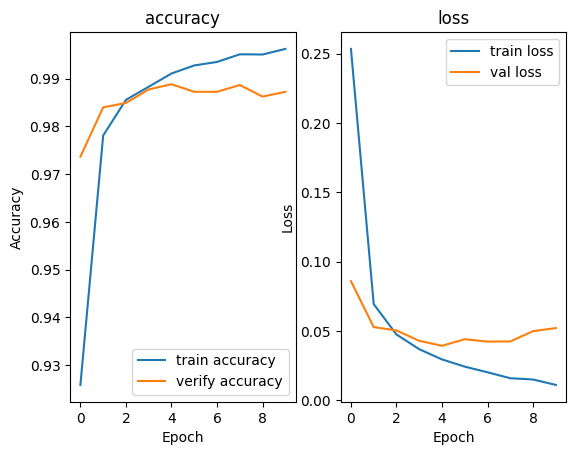

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import datasets,layers
import matplotlib.pyplot as plt

# 加载mnist数据集
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),  #28-3+1/1 + 1 = 26,32
    layers.MaxPooling2D((2,2)),             # 26/2=13,32
    layers.Conv2D(64,(3,3),activation='relu'), # 13-3+1/1 + 1 = 11,64
    layers.MaxPooling2D((2,2)),  # 11/2 = 6,64
    layers.Flatten(), # 6*6*64 = 2304
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,
                batch_size=128,
                epochs=10,
                validation_split=0.2)

test_loss,test_acc = model.evaluate(x_test,y_test)
print(f'accuracy: {test_acc:.4f}')

model.save('./models/mnist_model_cnn_tf.h5')  # 保存为HDF5格式
print("模型已保存到./models/mnist_model_cnn_tf.h5")

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='verify accuracy')
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


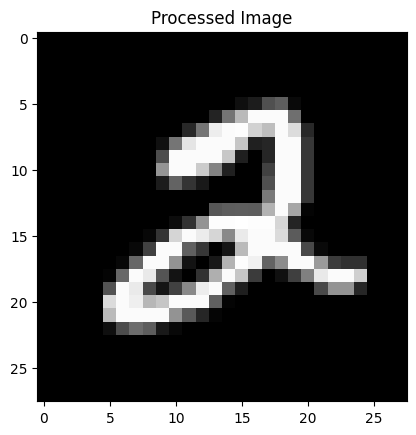

预处理后的数据范围： 0.12156863 0.83137256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
预测概率分布： [[3.0960881e-09 1.5032079e-09 9.9999988e-01 7.3625035e-09 2.2941347e-09
  3.6706155e-12 2.5781807e-12 7.7586833e-08 4.7858329e-08 1.4447438e-10]]
预测结果：2


In [8]:
# 测试tf训练的手写数据识别
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 加载模型
model = tf.keras.models.load_model('./models/mnist_model_cnn_tf.h5')

# 加载并预处理图片
image_path = './test/2.png'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
image = tf.keras.preprocessing.image.img_to_array(image)

# 可视化预处理后的图片
plt.imshow(image, cmap='gray')
plt.title('Processed Image')
plt.show()

# 进一步处理
image = image.reshape(-1, 28 , 28, 1) / 255.0

# 打印预处理后的数据
print("预处理后的数据范围：", np.min(image), np.max(image))

# 进行预测
predictions = model.predict(image)
print("预测概率分布：", predictions)

# 获取预测结果
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
print(f"预测结果：{predicted_class}")

# CNN实现MNIST手写数字识别 - torch

Epoch 10/10: 100%|██████████| 938/938 [00:27<00:00, 34.48batch/s, Loss=0.0125, Accuracy=99.58]


Test Loss: 0.0438, Test Accuracy: 98.95%
模型已保存 ./models/mnist_model_cnn_torch.pth


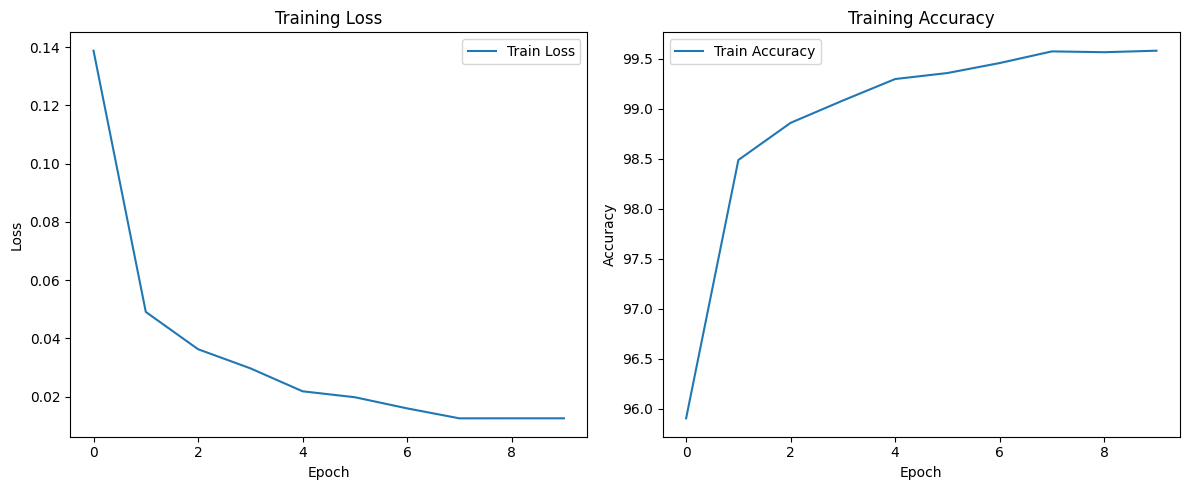

In [5]:
from modulefinder import test
import torch
from torch.utils.data import DataLoader  # 显式导入DataLoader
import torch.nn as nn
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

# 处理数据
transform = transforms.Compose([
    transforms.ToTensor(),  # 添加 ToTensor
    transforms.Normalize(mean=[0.5],std=[0.5])
])

# 导入数据
trainset = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
testset = datasets.MNIST(root='./data',train=False,download=True,transform=transform)  # 修正测试集

trainloader = DataLoader(trainset,batch_size=64,shuffle=True)
testloader = DataLoader(testset,batch_size=64,shuffle=False)  # 使用正确的测试集

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet,self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flat(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = SimpleNet()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    train_iter = tqdm(trainloader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch')

    for images,labels in train_iter:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()

        _,predicted = torch.max(output.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()
        train_iter.set_postfix({
            'Loss': f"{running_loss / len(train_iter):.4f}",
            'Accuracy': f"{100 * correct / total:.2f}"
        })

    # 将统计信息移到循环外
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)    

model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for images,labels in testloader:
        images, labels = images.to(device), labels.to(device)
        output = model.forward(images)
        loss = criterion(output,labels)

        _,predicted = torch.max(output.data,1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        test_loss += loss.item()

test_loss /= len(testloader)
test_acc = 100 * test_correct / test_total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

torch.save({
    'model_state_dict':model.state_dict(),
   'optimizer_state_dict':optimizer.state_dict(),
   'model_definition':SimpleNet
},'./models/mnist_model_cnn_torch.pth')
print("模型已保存 ./models/mnist_model_cnn_torch.pth")

# 训练结束后绘制曲线
plt.figure(figsize=(12, 5))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()


# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

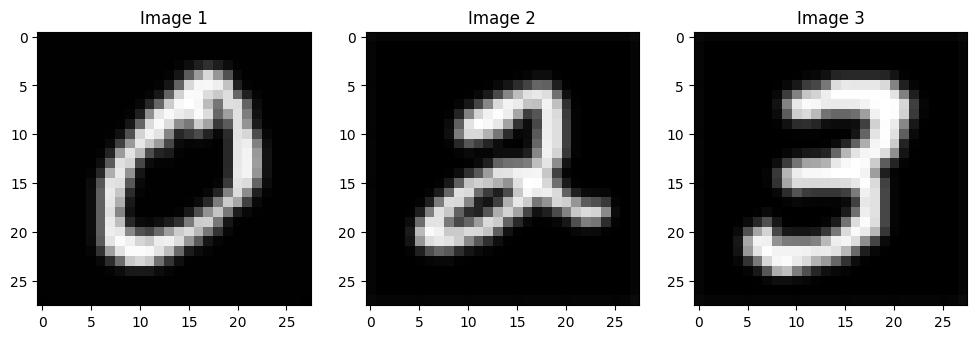

图片 ./test/0.png 的预测结果：0
概率分布：[9.9999154e-01 5.6558246e-08 3.9694714e-07 5.7686158e-09 4.9810051e-08
 1.6635587e-09 4.9098890e-06 1.9493548e-08 1.0571516e-06 2.1142114e-06]
----------------------------------------
图片 ./test/2.png 的预测结果：2
概率分布：[2.3606985e-07 1.3911462e-07 9.9999619e-01 1.7604706e-06 1.4577779e-07
 3.0409397e-09 4.2655217e-09 8.3528255e-07 5.8725487e-07 9.2491959e-08]
----------------------------------------
图片 ./test/3.png 的预测结果：3
概率分布：[1.3083167e-14 2.3400937e-10 5.6043814e-10 9.9999726e-01 8.9110906e-12
 1.3752571e-06 2.9259326e-15 1.3170462e-06 1.0465531e-09 3.7561829e-08]
----------------------------------------


In [6]:
# 多图片同时预测
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 加载模型
checkpoint = torch.load('./models/mnist_model_cnn_torch.pth')
model = checkpoint['model_definition']()
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # 设置为评估模式

# 图片预处理
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载并预处理多个图片
image_paths = ['./test/0.png', './test/2.png', './test/3.png']  # 添加更多图片路径
images = [Image.open(path) for path in image_paths]
processed_images = torch.stack([transform(img) for img in images])  # 将多个图片堆叠成一个批次

# 可视化预处理后的图片
fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
for i, img in enumerate(processed_images):
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'Image {i+1}')
plt.show()

# 进行预测
with torch.no_grad():
    outputs = model(processed_images)  # 直接传入批次数据
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_classes = torch.argmax(probabilities, dim=1).numpy()

# 打印预测结果
for i, (path, pred, prob) in enumerate(zip(image_paths, predicted_classes, probabilities)):
    print(f"图片 {path} 的预测结果：{pred}")
    print(f"概率分布：{prob.numpy()}")
    print("-" * 40)